In [1]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import cv2
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating the labels, def the image size, reading and storing the images in dataset varibale.
labels = ['Negative', 'Positive']

img_size = 120

def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset = read_images('C:/users/parit/Internship/Data/Surface_cracks')

In [3]:
# Function to load and analyze the data visually
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        if len(images) > 3:
            break
    fig=plt.figure(figsize=(5, 7))
    xrange = range(1,5)
    
    for img,x in zip(images, xrange):
        ax = fig.add_subplot(2, 2, x)
        ax.imshow(img)
        ax.set_title(img.shape)

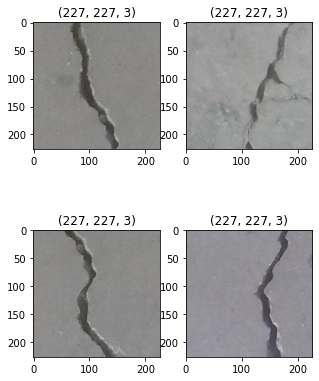

In [4]:
# Loading the positive (surface having cracks) photos
load_images_from_folder("C:/users/parit/Internship/Data/Surface_cracks/Positive")

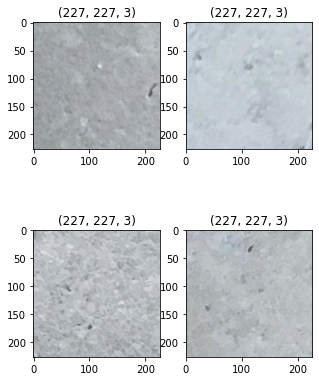

In [5]:
# Loading the negative (surface not having cracks) photos
load_images_from_folder("C:/users/parit/Internship/Data/Surface_cracks/Negative")

Text(0.5, 1.0, 'Number of Images')

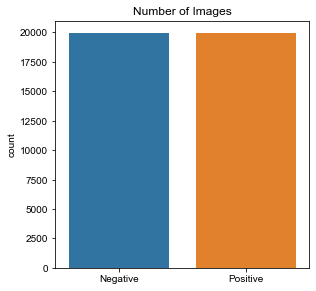

In [6]:
# Visualizing the dataset
Im = []

for i in Dataset:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sbs.set_style('darkgrid')
axl = sbs.countplot(Im)
axl.set_title("Number of Images")

In [7]:
# Creating seperate variables (X,y) to store the features and the labels acc.
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

# Normalizing the image data
x = np.array(x).reshape(-1, img_size, img_size, 1).astype('float32') / 255.0
y = np.array(y)

In [8]:
def to_rgb(x):
    x_rgb = np.zeros((x.shape[0], img_size, img_size, 3))
    for i in range(3):
        x_rgb[..., i] = x[..., 0]
    return x_rgb
x_train = to_rgb(x)

(-0.5, 119.5, 119.5, -0.5)

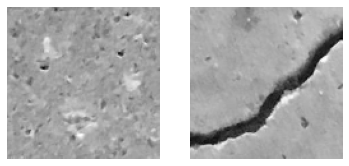

In [9]:
# Plot for the image not having a crack.
plt.subplot(1, 2, 1)
plt.imshow(x[1000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')

# Plot for the image having a crack.
plt.subplot(1, 2, 2)
plt.imshow(x[30000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')

In [10]:
# CNN model
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

In [11]:
# Model training
opt = Adam(lr=1e-4)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

history = model.fit(x, y, epochs = 10, batch_size = 128, validation_split = 0.25, verbose=1)

Epoch 1/10
235/235 [==============================] - 528s 2s/step - loss: 0.1480 - accuracy: 0.9500 - val_loss: 0.0552 - val_accuracy: 0.9895
Epoch 2/10
235/235 [==============================] - 542s 2s/step - loss: 0.0312 - accuracy: 0.9918 - val_loss: 0.1008 - val_accuracy: 0.9615
Epoch 3/10
235/235 [==============================] - 537s 2s/step - loss: 0.0177 - accuracy: 0.9953 - val_loss: 0.0799 - val_accuracy: 0.9716
Epoch 4/10
235/235 [==============================] - 560s 2s/step - loss: 0.0128 - accuracy: 0.9966 - val_loss: 0.0318 - val_accuracy: 0.9893
Epoch 5/10
235/235 [==============================] - 526s 2s/step - loss: 0.0108 - accuracy: 0.9973 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 6/10
235/235 [==============================] - 524s 2s/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0398 - val_accuracy: 0.9872
Epoch 7/10
235/235 [==============================] - 523s 2s/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0989 - val_accuracy: 0.9709

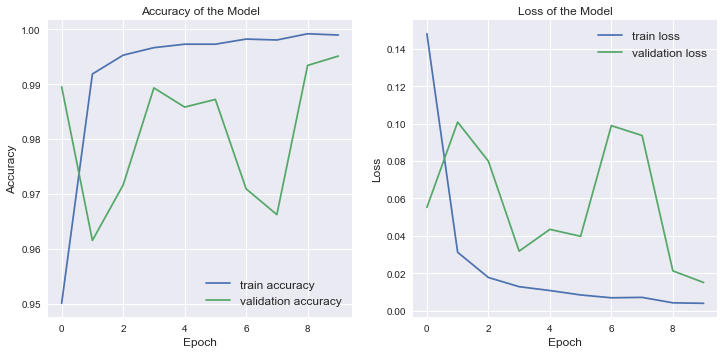

In [12]:
# Graphical representation of the accuracy metric.
plt.style.use('seaborn')
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

# Graphical representation of the loss metric.
plt.style.use('seaborn')
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y, predictions, target_names = ['Negative','Positive']))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     20000
    Positive       1.00      1.00      1.00     20000

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

